# Dataset: Online Shoppers Purchasing Intention Dataset

### **Objective**

Use visualization and EDA structures to report findings and prove/disprove hypotheses related to the data of online shopping purchasing intentions based on variety of factors.

This dataset has 12,330 entries,--84.5% (10,422) being negative class samples, where shoppers did not purchase anything, and 1,908 positive cases where consumers purchased something. It is multivariate with 17 features and is related to the subject area of business. It has no missing values, and contains categorical, numerical, and binary data.

In [90]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns

# Reads in the dataset
df = pd.read_csv("online_shoppers_intention.csv")

### Describe the data

In [107]:
# Describe the numerical columns in the dataset
numericalCols = df.select_dtypes(include=['number']).columns
print(df[numericalCols].describe())
print("\n")

# Show the info
df.info()

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

The .describe() method allows us to see the count, mean, standard deviation, minumum, the first quartile, second quartile, third quartile, and maximum for each numerical column.

The .info() method displays the column number, each category in the dataset, its number of entries, whether any null values exist, and its data type (int64, float64, object, bool).

### Bar Graph Comparing Number of Sales Per Month

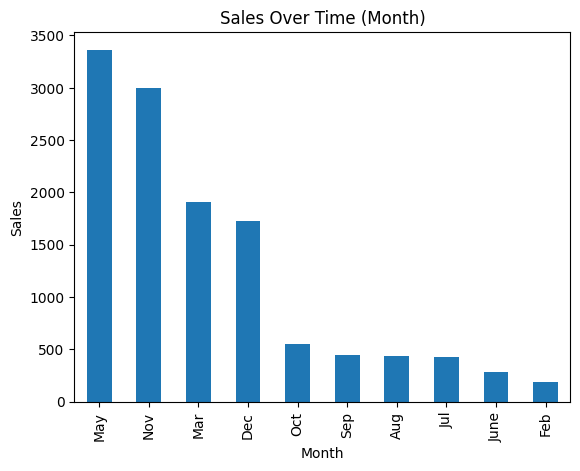


Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64


In [119]:
monthCount = df["Month"].value_counts()

# Set up the graph
plt.title("Sales Over Time (Month)")
plt.xlabel("Month")
plt.ylabel("Sales")
monthCount.plot(kind="bar")
plt.show()

print()
print(df["Month"].value_counts())
df["Month"]

Since November has a questionably high number of data entries compared to other months like February, normalizing the data to account for each month's sales rate rather than the number of sales would be a more accurate metric.

### Bar Graph Comparing Proportion of Sales Per Month

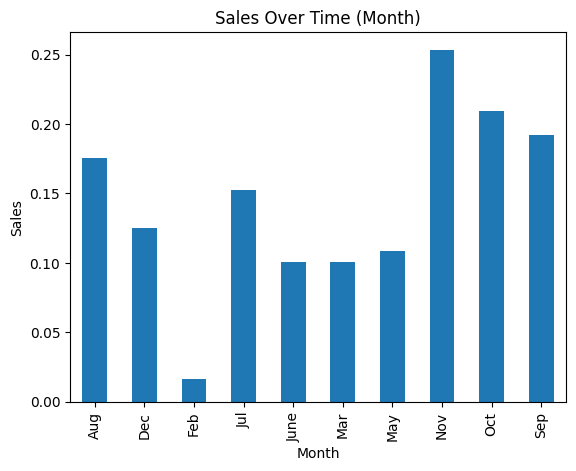


 Month
Aug     0.175520
Dec     0.125072
Feb     0.016304
Jul     0.152778
June    0.100694
Mar     0.100682
May     0.108502
Nov     0.253502
Oct     0.209472
Sep     0.191964
dtype: float64


In [164]:
# Calculate the number of sales per month
monthlySales = df[df["Revenue"] == True].groupby("Month").size()

# Calculate the total number of sessions per month
totalMonthlySales = df.groupby("Month").size()

# Calculate the sales rate
monthlySalesRate = monthlySales / totalMonthlySales

# Create the bar graph
monthlySalesRate.plot(kind="bar")
plt.title("Sales Over Time (Month)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

# Print the sales rate for each month
print("\n", monthlySalesRate)

Although November is still leading in sales, this bar graph provides a more accurate visualization of the data, as it is in form of percentages of sales rather than number of sales. We can observe that February is still in last place for both their number of sales and proportion of sales.

### Bar Graph Comparing Purchase Rates Between Different Browsers (1-13)

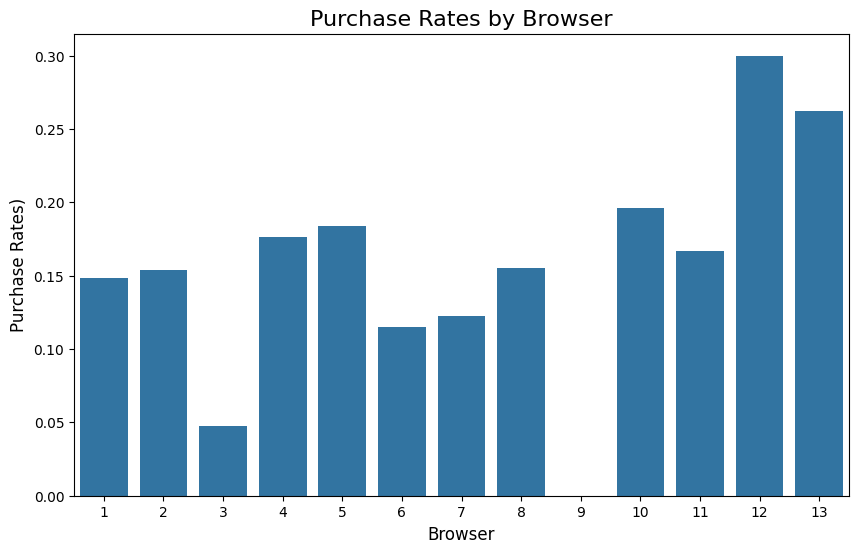


 Browser
1     0.148253
2     0.153624
3     0.047619
4     0.176630
5     0.184154
6     0.114943
7     0.122449
8     0.155556
9     0.000000
10    0.196319
11    0.166667
12    0.300000
13    0.262295
Name: Revenue, dtype: float64


In [146]:
# Group the data by browser
purchaseRates = df.groupby('Browser')['Revenue'].mean()

# Plot the purchase rates by browser
plt.figure(figsize=(10, 6))
sns.barplot(x=purchaseRates.index, y=purchaseRates.values)

# Create the bar graph
plt.title('Purchase Rates by Browser', fontsize=16)
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Purchase Rates)', fontsize=12)
plt.show()

# Print conversion rates
print("\n", purchaseRates)

As the bar graph shows, there are no purchases made on Browser 9. Browser 12 has the most purchases made on it, followed closely by Browser 13, which is only about 0.04 behind in terms of its proportion of purchases. Purchases are made when Revenue == True.

### Bar Graph Comparing Returning Visitors vs. New Visitors

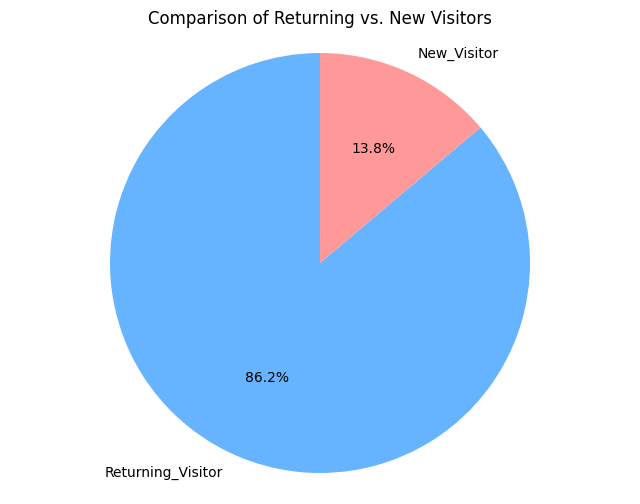

In [153]:
# Filter the data to only include Returning_Visitor and New_Visitor
df_cleaned = df[df["VisitorType"].isin(["Returning_Visitor", "New_Visitor"])]

# Count the occurrences of Returning_Visitor and New_Visitor
visitor_counts = df_cleaned['VisitorType'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))

# Plot the pie chart
plt.pie(visitor_counts, labels=visitor_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Comparison of Returning vs. New Visitors")
plt.axis('equal')
plt.show()

The pie chart shows the number of returning visitors in blue and the number of new visitors in red. There are far more returning visitors participating in this dataset compared to new ones.

### Pie Chart Comparing Weekend vs. Weekday Visits

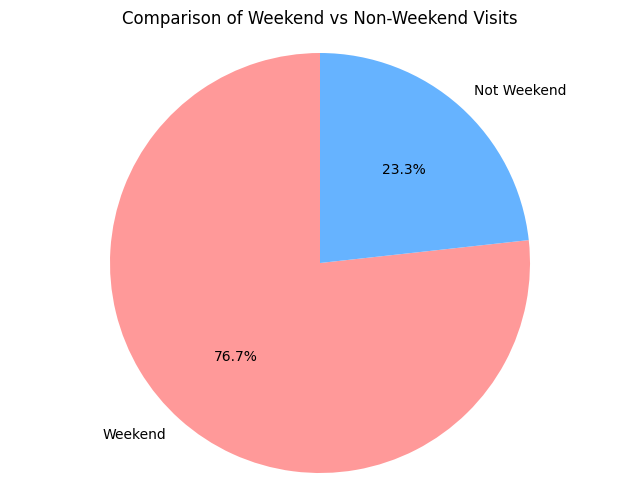

In [165]:
import matplotlib.pyplot as plt

# Count the occurrences of weekend == True and weekend == False
weekend_counts = df['Weekend'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))

# Plot the pie chart
plt.pie(weekend_counts, labels=['Weekend', 'Not Weekend'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Comparison of Weekend vs Non-Weekend Visits")
plt.axis('equal')
plt.show()

As the pie chart shows, there are more visitors on the weekend compared to the weekdays. This may be a result of people having more time, people may not have to go to work or school, and therefore have more time to shop.

# Hypotheses Formulation

Hypothesis 1: Revenue is significantly higher on special days of the year (Mother's Day, Valentine's Day).

Hypothesis 2: Customers that spend more time on product related pages are more likely to make a purchase.

## Testing Hypothesis 1:

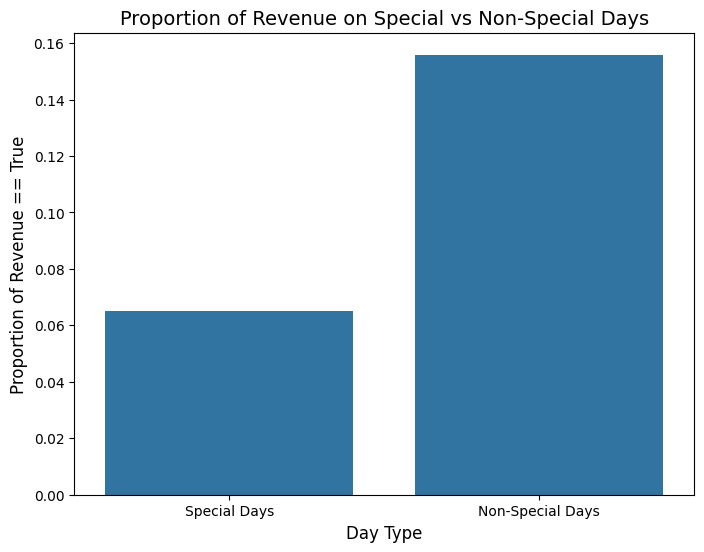


Proportion of Revenue == True on special days: 0.06
Proportion of Revenue == True on non-special days: 0.16
Hypothesis is not supported: Revenue is not significantly higher on special days.


In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for special days (SpecialDay >= 0.7)
special = df[df["SpecialDay"] == 1]

# Filter the data for non-special days (SpecialDay < 1)
notSpecial = df[df["SpecialDay"] < 1]

# Calculate the proportion of 'True' values in the 'Revenue' column for special days
specialRev = special["Revenue"].sum()  # Count of 'True' values (Revenue == True)
specialTotal = len(special)  # Total number of special days
specialPercent = specialRev / specialTotal  # Proportion of 'True' values

# Calculate the proportion of 'True' values in the 'Revenue' column for non-special days
notSpecialRev = notSpecial["Revenue"].sum()  # Count of 'True' values (Revenue == True)
notSpecialTotal = len(notSpecial)  # Total number of non-special days
notSpecialPercent = notSpecialRev / notSpecialTotal  # Proportion of 'True' values

# Create a DataFrame for plotting
data = {
    'Day Type': ['Special Days', 'Non-Special Days'],
    'Revenue Proportion': [specialPercent, notSpecialPercent]
}

df_plot = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Day Type', y='Revenue Proportion', data=df_plot)

# Set the title and labels
plt.title('Proportion of Revenue on Special vs Non-Special Days', fontsize=14)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Proportion of Revenue == True', fontsize=12)

# Display the plot
plt.show()

# Print the results for comparison (rounding to 2 decimal places)
print(f"\nProportion of Revenue == True on special days: {specialPercent:.2f}")
print(f"Proportion of Revenue == True on non-special days: {notSpecialPercent:.2f}")

# Check if the hypothesis is supported by comparing the proportions
if specialPercent > notSpecialPercent:
    print("Hypothesis is supported: Revenue is significantly higher on special days.")
else:
    print("Hypothesis is not supported: Revenue is not significantly higher on special days.")


## **Results:**

The bar graph shows that on non-special days, the proportion of revenue is significantly higher compared to special days. While on special days, the proportion of revenue was 0.06, whereas on non-special days, the proportion was 0.10 higher. This means that special days are not related to revenue gain, even though it may seem likely that they are because people may tend to purchase more things closer to holidays like Valentine's Day or Mother's Day.

**Null Hypothesis (HO):** There is no significant difference in terms of revenue regardless of if it is a special day or not a special day.

**Alternative Hypothesis (HA):** Revenue is significantly higher on special days compared to non-special days.



In [183]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame

# Filter the data for special and non-special days
special = df[df["SpecialDay"] == 1].copy()  # Create a copy of the filtered data
not_special = df[df["SpecialDay"] < 1].copy()  # Create a copy of the filtered data

# Convert Revenue to 0 and 1 (if it's not already in numerical format)
special["Revenue"] = special["Revenue"].astype(int)  # Convert Revenue to 0 and 1
not_special["Revenue"] = not_special["Revenue"].astype(int)  # Convert Revenue to 0 and 1

# Calculate the proportion of 'True' values (Revenue == True) for both groups
special_rev = special["Revenue"].mean()  # Proportion of revenue for special days
not_special_rev = not_special["Revenue"].mean()  # Proportion of revenue for non-special days

# Perform an independent t-test to compare the revenue proportions
t_stat, p_value = stats.ttest_ind(special["Revenue"], not_special["Revenue"])

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.1020173665657738
P-value: 0.0019264082201239955


The T-statistic provides information about how many standard deviations the sample mean is away from the population mean while under the null hypothesis. In this situation, it means that the mean is lower for special days than it is for non-special days, since the T-statistic is negative. The P-value of 0.0019 is very low, showing that the difference between the revenue proportions on the two types of days is statistically significant. This meanas, we should reject the null hypothesis.

## Testing Hypothesis 2

Hypothesis 2: Customers that spend more time on product related pages are more likely to make a purchase.

<ipython-input-173-bbe52590a716>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_rate_by_time = df.groupby('TimeRange')['Revenue'].mean().reset_index()


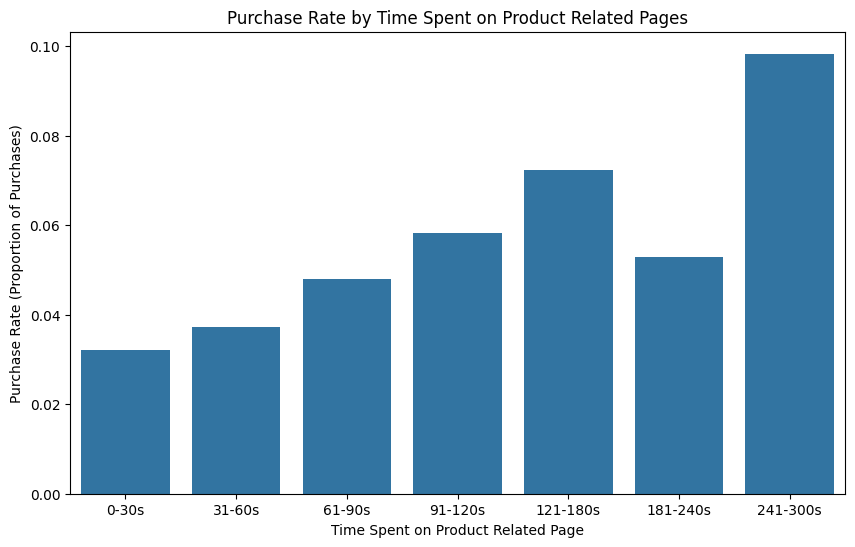

In [173]:
# Create time bins for ProductRelated_Duration
bins = [0, 30, 60, 90, 120, 180, 240, 300]  # Customize the bins based on your data
labels = ['0-30s', '31-60s', '61-90s', '91-120s', '121-180s', '181-240s', '241-300s']

# Create a new column with these time bins
df['TimeRange'] = pd.cut(df['ProductRelated_Duration'], bins=bins, labels=labels, right=False)

# Calculate the proportion of purchases in each time range
purchaseRateByTime = df.groupby('TimeRange')['Revenue'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='TimeRange', y='Revenue', data=purchaseRateByTime)

# Set the title and labels
plt.title("Purchase Rate by Time Spent on Product-Related Pages")
plt.xlabel("Time Spent on Product Related Page")
plt.ylabel("Purchase Rate")

# Display the plot
plt.show()

This bar graph creates a visualization of how likely a user will make a purchase depending on the amount of time they spend on product-related pages. With the goal of making a connection between those two factors, the data shows that as the amount of seconds spent goes up, the more purchases are made. Although the values are all rather, close since they are increasing as the time increases, it proves our hypothesis that more time spent on product-related pages allows for more purchases, and therefore more revenue.

**Null Hypothesis (H0):** There is no relationship between time spent on product-related pages and a visitor's purchase rate.

**Alternative Hypothesis (HA):** More time spent on product-related pages increases the likelihood of making a purchase.

In [184]:
from scipy import stats
# Convert the 'Revenue' column to numeric values (1 for True, 0 for False)
df['Revenue_numeric'] = df['Revenue'].astype(int)

# Group the data by 'TimeRange' and perform t-test
group_1 = df[df['TimeRange'] == '0-30s']['Revenue_numeric']
group_2 = df[df['TimeRange'] == '181-240s']['Revenue_numeric']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(group_1, group_2)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -2.1244429296782137
P-value: 0.03377249313078724


Since the P-value is below the common significance threshold of 0.05, it is considered low, meaning that we reject the null hypothesis, as there is a significant difference in purchase rates. The T-statistic conveys that the two groups have a statistically significant difference between the two.

### Machine Learning

In [163]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Month' column (categorical to numerical)
labelEncoder = LabelEncoder()
df_cleaned['Month'] = labelEncoder.fit_transform(df_cleaned['Month'])

# Encode the 'VisitorType' column (New_Visitor, Returning_Visitor to 0, 1)
df_cleaned['VisitorType'] = df_cleaned['VisitorType'].map({'New_Visitor': 0, 'Returning_Visitor': 1})

# Model training
X = df_cleaned[['SpecialDay', 'VisitorType', 'ProductRelated_Duration', 'Month']]
y = df_cleaned['Revenue']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7693971343606381
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      3124
           1       0.23      0.21      0.22       575

    accuracy                           0.77      3699
   macro avg       0.54      0.54      0.54      3699
weighted avg       0.76      0.77      0.76      3699



Sci-kit learn is a well-known open-source library for machine learning in Python. This code is specifically changing the values in the "Month" column into numerical value--the label encoder assigns an integer to each new value in the column. Then, the code changes the visitor types into numerical ones, making new visitors into 0s and returning visitors into 1s. The data is then cleaned, and y is set as the taget variable, which will provide us our data predictions. The data is split into testing data and training data. We dedicate 70% of the data into to train the model, while the other 30% of data is used to evaluat the performance of the model. Using RandomForestClassifier, we set estimators, fit the data, and make a prediction.

### Analysis of Results

These results indicate that the accuracy of the data is roughly 76.94%, meaning that the model would make an accurate prediction 77% of the time.

### Precision

The precision metric portrays the proportion of positive predictions that were actually correct. For class 0, which evaluated the no purchase, the precision was 0.86, which means it was correct 86% of the time, and for class 1, it was correct 23% of the time because the precision was 0.23--which indicates that the model came up with a lot of fake positives.

### Recall

The recall, whcih measures how well the mdoel identifies the actual positives was 0.86 for no purchases and 0.21 for purchases, which again shows that the model is having a hard time dealing with false negatives. The data seems to have a class imbalance, as it is doing well predicting the majority class of no purchases but not with the minority class.

Citation: Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.